In [2]:
#k-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#init random center
pts = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

np.random.seed(200)
k = 3

ctn = {i+1:[np.random.randint(0, 80), np.random.randint(0, 80)] for i in range(k)}


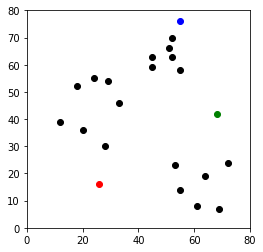

In [8]:
#display original data
fig = plt.figure(figsize=(4, 4))
plt.scatter(pts['x'], pts['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in ctn.keys():
    plt.scatter(*ctn[i], color=colmap[i])
    
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [11]:
#assign color based on center
def assignment(pts, ctn):
    for i in ctn.keys():
        pts['distance_from_{}'.format(i)] = (
            np.sqrt(
                (pts['x'] - ctn[i][0]) ** 2 +
                (pts['y'] - ctn[i][1]) ** 2
            )
        )
    
    ctn_colors = ['distance_from_{}'.format(i) for i in ctn.keys()]
    pts['closest'] = pts.loc[:, ctn_colors].idxmin(axis=1)
    pts['closest'] = pts['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    pts['color'] = pts['closest'].map(lambda x: colmap[x])
    return pts

pts = assignment(pts, ctn)

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


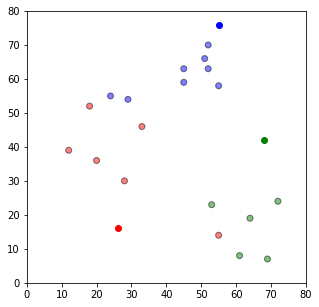

In [13]:
print(pts.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(pts['x'], pts['y'], color=pts['color'], alpha=0.5, edgecolor='k')
for i in ctn.keys():
    plt.scatter(*ctn[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [15]:
import copy
pre_ctn = copy.deepcopy(ctn)
def update(k):
    for i in ctn.keys():
        ctn[i][0] = np.mean(pts[pts['closest'] == i]['x'])
        ctn[i][1] = np.mean(pts[pts['closest'] == i]['y'])
    return k

ctn = update(ctn)

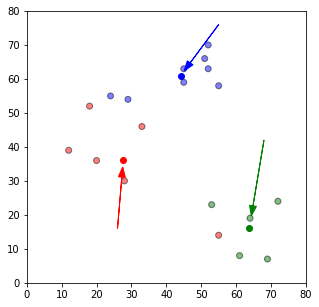

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(pts['x'], pts['y'], color=pts['color'], alpha=0.5, edgecolor='k')
for i in ctn.keys():
    plt.scatter(*ctn[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in pre_ctn.keys():
    old_x = pre_ctn[i][0]
    old_y = pre_ctn[i][1]
    dx = (ctn[i][0] - pre_ctn[i][0]) * 0.75
    dy = (ctn[i][1] - pre_ctn[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

In [21]:
#repeat until converge
while True:
    final_pts = pts['closest'].copy(deep=True)
    ctn = update(ctn)
    pts = assignment(pts, ctn)
    if final_pts.equals(pts['closest']):
        break

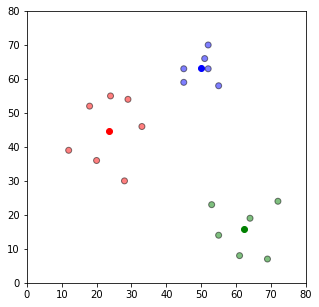

In [22]:
#display
fig = plt.figure(figsize=(5, 5))
plt.scatter(pts['x'], pts['y'], color=pts['color'], alpha=0.5, edgecolor='k')
for i in ctn.keys():
    plt.scatter(*ctn[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()